In [20]:
import pandas as pd
import matplotlib.pyplot as plt

rider_100_80 = pd.read_csv("./data/rider_100_80_tenByOneKm.csv")
rider_100 = pd.read_csv("./data/rider_100_tenByOneKm.csv")

In [21]:
print(f"Rider 100/80 time: {rider_100_80.shape[0]} seconds")
print(f"Rider 100 time: {rider_100.shape[0]} seconds")

Rider 100/80 time: 2260 seconds
Rider 100 time: 2279 seconds


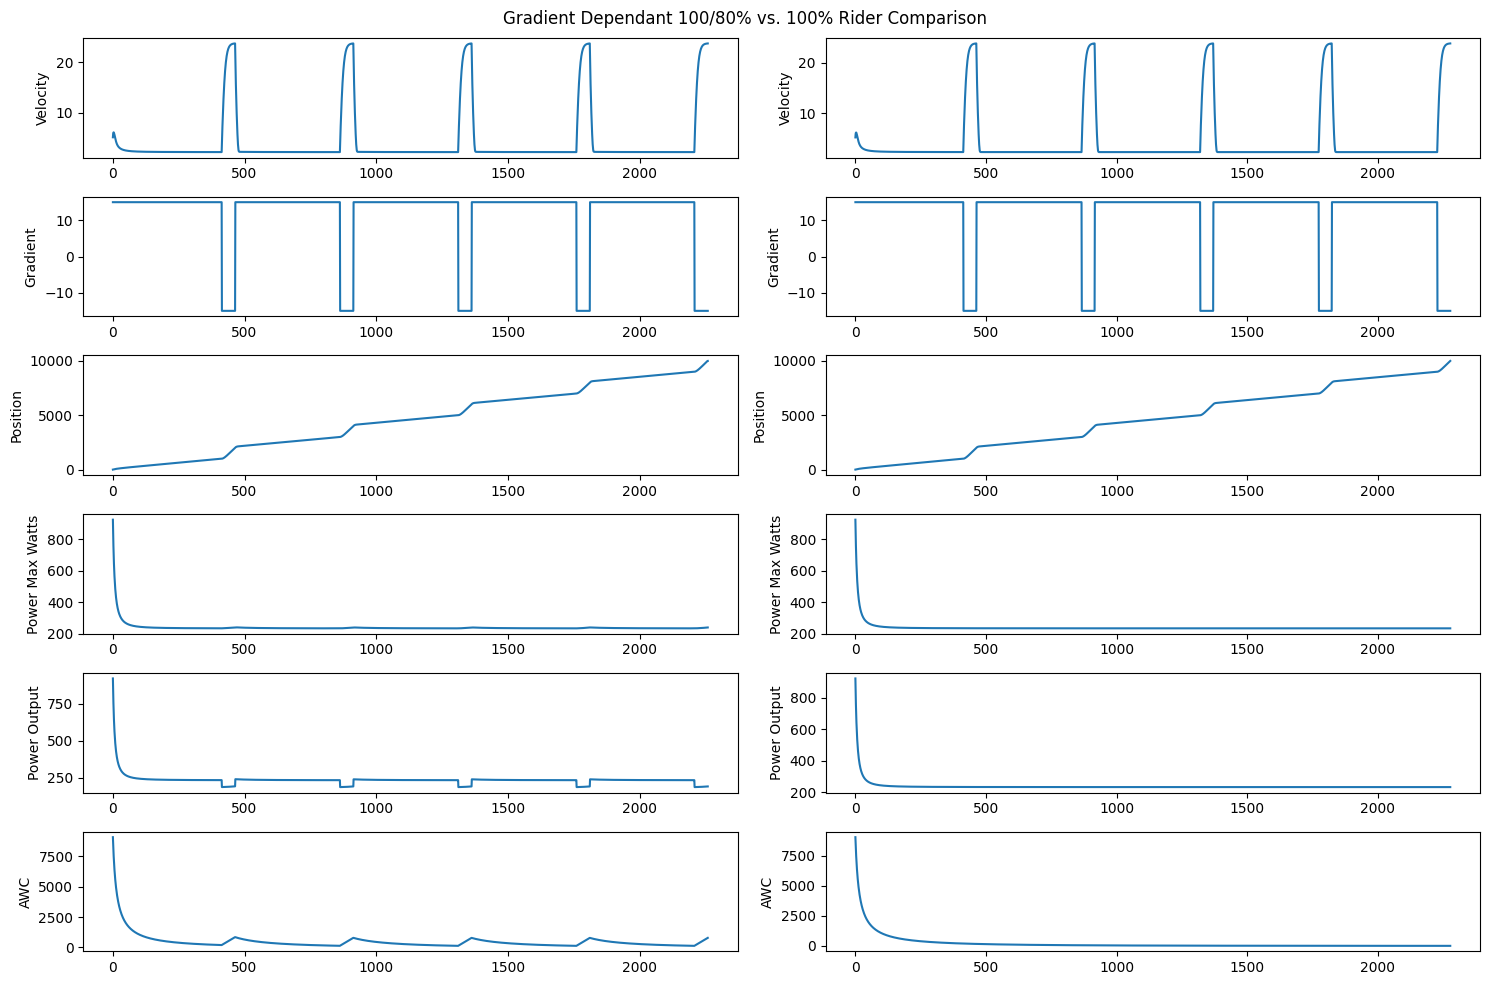

In [23]:
plt.rcParams['figure.figsize'] = [15, 10]

fig, axs = plt.subplots(6, 2)
fig.suptitle("Gradient Dependant 100/80% vs. 100% Rider Comparison")

# Plot for Rider Constant
axs[0, 0].plot(rider_100_80.index, rider_100_80['velocity'])
axs[0, 0].set_ylabel('Velocity')

axs[1, 0].plot(rider_100_80.index, rider_100_80['gradient'])
axs[1, 0].set_ylabel('Gradient')

axs[2, 0].plot(rider_100_80.index, rider_100_80['position'])
axs[2, 0].set_ylabel('Position')

axs[3, 0].plot(rider_100_80.index, rider_100_80['power_max_w'])
axs[3, 0].set_ylabel('Power Max Watts')

axs[4, 0].plot(rider_100_80.index, rider_100_80['power_output'])
axs[4, 0].set_ylabel('Power Output')

axs[5, 0].plot(rider_100_80.index, rider_100_80['AWC'])
axs[5, 0].set_ylabel('AWC')

# Plot for Rider Model
axs[0, 1].plot(rider_100.index, rider_100['velocity'])
axs[0, 1].set_ylabel('Velocity')

axs[1, 1].plot(rider_100.index, rider_100['gradient'])
axs[1, 1].set_ylabel('Gradient')

axs[2, 1].plot(rider_100.index, rider_100['position'])
axs[2, 1].set_ylabel('Position')

axs[3, 1].plot(rider_100.index, rider_100['power_max_w'])
axs[3, 1].set_ylabel('Power Max Watts')

axs[4, 1].plot(rider_100.index, rider_100['power_output'])
axs[4, 1].set_ylabel('Power Output')

axs[5, 1].plot(rider_100.index, rider_100['AWC'])
axs[5, 1].set_ylabel('AWC')

plt.tight_layout()
plt.show()
